<a href="https://colab.research.google.com/github/hayannn/AIFFEL_MAIN_QUEST/blob/main/%5BMainQuest09%5D%EB%89%B4%EC%8A%A4_%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vocabulary Size를 변경해서 시도해보기

- 라이브러리 버전 확인

In [1]:
import tensorflow
import matplotlib
import seaborn
import numpy
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.17.1
3.8.0
0.13.2
1.26.4
2.2.2
1.6.0


## 1. 모든 단어 사용

### 데이터 전처리

- 필요한 라이브러리 import
- 데이터 로드 및 분리 ➡️ 여기에서 개수 조절
- 문장 최대 길이 확인 및 패딩 처리(샘플 길이 맞추기)
- 원-핫 인코딩 수행

In [9]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print(f'훈련 샘플 개수: {len(x_train)}')
print(f'테스트 샘플 개수: {len(x_test)}')
print(f'카테고리 수: {len(set(y_train))}')

max_len = max(len(seq) for seq in x_train)
print(f'최대 길이: {max_len}')

# TF-IDF
word_index = reuters.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = '[PAD]'
index_to_word[1] = '[START]'
index_to_word[2] = '[UNK]'

tokenizer = Tokenizer(num_words=10000)
x_train_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_train]
x_test_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_test]

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer.fit_transform(x_train_text)
x_test_tfidf = vectorizer.transform(x_test_text)

훈련 샘플 개수: 8982
테스트 샘플 개수: 2246
카테고리 수: 46
최대 길이: 2376


### ML 모델 적용

#### 나이브 베이즈 분류기

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.datasets import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

# 모델 생성 및 학습
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

# 예측 및 평가
y_pred = nb.predict(x_test_tfidf)
print("정확도:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

정확도: 0.6562778272484416
F1-Score: 0.5747628007079842
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.61      0.65      0.63       105
           2       0.00      0.00      0.00        20
           3       0.80      0.90      0.85       813
           4       0.52      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.64      0.63      0.63        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.71     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### CNB

In [13]:
from sklearn.naive_bayes import ComplementNB

cb = ComplementNB()
cb.fit(x_train_tfidf, y_train)

# 예측 및 평가
y_pred = cb.predict(x_test_tfidf)
print("정확도:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

정확도: 0.7729296527159395
F1-Score: 0.7476576191807076
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.63      0.87      0.73       105
           2       0.91      0.50      0.65        20
           3       0.90      0.90      0.90       813
           4       0.76      0.92      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.55      0.16      0.24        38
           9       0.79      0.92      0.85        25
          10       0.96      0.83      0.89        30
          11       0.56      0.73      0.64        83
          12       0.00      0.00      0.00        13
          13       0.61      0.59      0.60        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.66     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 로지스틱 회귀

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_train_tfidf, y_train)

y_pred = lr.predict(x_test_tfidf)
print("정확도:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

정확도: 0.8085485307212823
F1-Score: 0.8023666150802042
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.74      0.79      0.76       105
           2       0.70      0.70      0.70        20
           3       0.91      0.93      0.92       813
           4       0.81      0.86      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.68      0.71      0.69        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.67      0.75      0.70        83
          12       0.50      0.31      0.38        13
          13       0.68      0.62      0.65        37
          14       0.67      1.00      0.80         2
          15       0.83      0.56      0.67         9
          16       0.68     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 서포트 벡터 머신

In [17]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(x_train_tfidf, y_train)

y_pred = lsvc.predict(x_test_tfidf)
print("정확도:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

정확도: 0.7894033837934105
F1-Score: 0.784287552489691
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.67      0.70      0.69       105
           2       0.67      0.80      0.73        20
           3       0.91      0.92      0.91       813
           4       0.81      0.86      0.84       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       0.67      0.67      0.67         3
           8       0.66      0.71      0.68        38
           9       0.78      0.84      0.81        25
          10       0.82      0.77      0.79        30
          11       0.66      0.76      0.70        83
          12       0.50      0.38      0.43        13
          13       0.60      0.57      0.58        37
          14       1.00      1.00      1.00         2
          15       0.60      0.33      0.43         9
          16       0.69      

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 결정 트리

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(x_train_tfidf, y_train)

y_pred = tree.predict(x_test_tfidf)
print("정확도:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

정확도: 0.6273374888691006
F1-Score: 0.5817351070726848
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.75      0.40      0.52       105
           2       0.80      0.40      0.53        20
           3       0.94      0.85      0.89       813
           4       0.40      0.90      0.55       474
           5       0.00      0.00      0.00         5
           6       1.00      0.64      0.78        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.87      0.87      0.87        30
          11       0.66      0.51      0.57        83
          12       0.33      0.08      0.12        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 랜덤 포레스트


In [21]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=0)

forest.fit(x_train_tfidf, y_train)

y_pred = forest.predict(x_test_tfidf)
print("정확도:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

정확도: 0.6585040071237755
F1-Score: 0.626685007174216
              precision    recall  f1-score   support

           0       0.33      0.50      0.40        12
           1       0.36      0.67      0.47       105
           2       0.22      0.20      0.21        20
           3       0.82      0.90      0.86       813
           4       0.63      0.86      0.73       474
           5       0.50      0.20      0.29         5
           6       0.78      0.50      0.61        14
           7       1.00      0.33      0.50         3
           8       0.62      0.47      0.54        38
           9       0.47      0.28      0.35        25
          10       0.55      0.20      0.29        30
          11       0.48      0.48      0.48        83
          12       0.67      0.15      0.25        13
          13       0.30      0.19      0.23        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.46      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 그래디언트 부스팅 트리

In [22]:
# 시간 오래 소요
from sklearn.ensemble import GradientBoostingClassifier

grbt = GradientBoostingClassifier(random_state=0, verbose=2) # 정보 함축 표시
grbt.fit(x_train_tfidf, y_train)

y_pred = grbt.predict(x_test_tfidf)
print("정확도:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

      Iter       Train Loss   Remaining Time 
         1           1.4337           26.33m
         2     1449831.9213           26.14m
         3     1452594.8841           25.94m
         4 483551805799458304.0000           27.84m
         5 483551807308791936.0000           27.20m
         6 1171563807990097317648309584832817079040397091930388093380296361795263176581429988413508093927875661606123366644711424.0000           26.59m
         7 1171563807990097317648309584832817079040397091930388093380296361795263176581429988413508093927875661606123366644711424.0000           26.41m
         8 1171563807990097317648309584832817079040397091930388093380296361795263176581429988413508093927875661606123366644711424.0000           27.77m
         9 1171563807990097317648309584832817079040397091930388093380296361795263176581429988413508093927875661606123366644711424.0000           27.55m
        10 117156380799009731764830958483281707904039709193038809338029636179526317658142998841350809392787

#### 보팅
  - 이전 노드 설정과 동일하게 사용
  - soft voting으로 설정
  - LR(패널티 L2), CNB, GBM 사용

In [24]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(x_train_tfidf, y_train)

y_pred = voting_classifier.predict(x_test_tfidf)
print("정확도:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

정확도: 0.815227070347284
F1-Score: 0.8112161706365728
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.78      0.74      0.76       105
           2       0.67      0.70      0.68        20
           3       0.92      0.94      0.93       813
           4       0.83      0.88      0.85       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.71      0.71      0.71        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.64      0.71      0.67        83
          12       0.60      0.46      0.52        13
          13       0.68      0.62      0.65        37
          14       0.22      1.00      0.36         2
          15       0.40      0.22      0.29         9
          16       0.73      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 전체 단어 결과 정리
- 나이브 베이즈 분류기
  - 정확도: 0.6562778272484416
  - F1-Score: 0.5747628007079842

<br>

- CNB
  - 정확도: 0.7729296527159395
  - F1-Score: 0.7476576191807076

<br>

- 로지스틱 회귀
  - 정확도: 0.8085485307212823
  - F1-Score: 0.8023666150802042

<br>

- 서포트 벡터 머신
  - 정확도: 0.7894033837934105
  - F1-Score: 0.784287552489691

<br>

- 결정 트리
  - 정확도: 0.6273374888691006
  - F1-Score: 0.5817351070726848

<br>

- 랜덤 포레스트
  - 정확도: 0.6585040071237755
  - F1-Score: 0.626685007174216

<br>

- 그래디언트 부스팅 트리
  - 정확도: 0.7666963490650045
  - F1-Score: 0.7636545776850703

<br>

- 보팅
  - 정확도: 0.815227070347284
  - F1-Score: 0.8112161706365728

<br>

---
#### 최적 모델 1위 : Voting
- 정확도: 0.815227070347284
- F1-Score: 0.8112161706365728

<br>

#### 최적 모델 2위 : 로지스틱 회귀
- 정확도: 0.8085485307212823
- F1-Score: 0.8023666150802042
---

> # 👉 전체 단어 Result(0.8152)
- 최적 모델 : voting
- 정확도 : 0.8152

### 전체 단어 결과 - ML 모델 특성 기반 성능 추이에 대한 분석


#### 데이터셋 특징
  - 46개의 클래스
  - 뉴스가 어떤 카테고리에 속하는지 예측
  - 3번, 4번 클래스에 특히 집중되어 있어 불균형한 데이터 형태를 가지고 있음

<br>


#### 각 모델 특징
  - 나이브 베이즈 분류기
    - 독립 변수의 경우, 조건부 독립의 가정을 하기 떄문에 데이터의 치우침이 있거나 결정 경계 가중치가 쏠려있다면 이 모델이 선호하는 특정 클래스가 발생하여 제대로 예측이 되지 않는 문제가 있음.
    - 실제로 결과 역시, 타 모델에 비해 좋지 못했음.

<br>

  - CNB
    - 데이터 불균형을 반영하는 방식으로 가중치를 부여하기 때문에, 기존 나이브 베이즈 분류기보다 나은 성능을 보임
    - 실제 결과도 타 모델과 비교했을때에도 크게 떨어지지 않음

<br>

  - 로지스틱 회귀
    - 선형 결정 경계를 사용하는 모델특성상 TF-IDF 변환 결과가 비교적 잘 적용되어, 보팅을 제외하면 가장 좋은 성능을 보임

<br>

  - 서포트 벡터 머신
    - 고차원 희소 행렬 형태를 가지고 있는 데이터셋에서는 다소 불리
    - 그럼에도 결과로 봤을 때, 나쁘지 않은 성능을 보임

<br>

  - 결정 트리
    - 텍스트 데이터와 같은 고차원 희소 데이터에는 다소 부적합
    - 결과를 봤을 때에도 데이터 불균형으로 인해,빈도가 높은 클래스에 편향되었을 가능성이 높아보임

<br>

  - 랜덤 포레스트
    - 이 역시, 데이터셋의 특징으로 인해 트리 분할 기준을 찾기가 다소 어려웠을 것
    - 실제로 성능도 좋지 않음

<br>

  - 그래디언트 부스팅 트리
    - 이 역시 트리 기반 모델의 단점들이 데이터셋에 영향을 미쳤을 가능성이 높으며, 연속적인 경계가 필요한 데이터셋 특성상 잘 맞지 않았을 가능성이 높음
    - 실제 결과로 보았을 때, 성능이 크게 떨어지지는 않으나 train 시간이 오래 걸리는 것을 고려했을 때 효율적 모델이라고 단정하기는 어려울듯 함

  - 보팅
    - 소프트 보팅을 이용해 확률 평균화로 결정된 모델이 사용되기 때문에, 가장 좋은 성능을 내었을 것으로 추측

<br>
<br>

## 2. 상위 5,000개 사용

In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

print(f'훈련 샘플 개수: {len(x_train)}')
print(f'테스트 샘플 개수: {len(x_test)}')
print(f'카테고리 수: {len(set(y_train))}')

max_len = max(len(seq) for seq in x_train)
print(f'최대 길이: {max_len}')

# TF-IDF
word_index = reuters.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = '[PAD]'
index_to_word[1] = '[START]'
index_to_word[2] = '[UNK]'

tokenizer = Tokenizer(num_words=10000)
x_train_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_train]
x_test_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_test]

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer.fit_transform(x_train_text)
x_test_tfidf = vectorizer.transform(x_test_text)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 샘플 개수: 8982
테스트 샘플 개수: 2246
카테고리 수: 46
최대 길이: 2376
550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


- ML 모델 적용

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.datasets import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

# 1. 나이브 베이즈 분류기
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
y_pred = nb.predict(x_test_tfidf)
print("나이브 베이즈 분류기 정확도:", accuracy_score(y_test, y_pred))
print("나이브 베이즈 분류기 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 2. CNB
cb = ComplementNB()
cb.fit(x_train_tfidf, y_train)
y_pred = cb.predict(x_test_tfidf)
print("CNB 정확도:", accuracy_score(y_test, y_pred))
print("CNB F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 3. 로지스틱 회귀
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_train_tfidf, y_train)
y_pred = lr.predict(x_test_tfidf)
print("로지스틱 회귀 정확도:", accuracy_score(y_test, y_pred))
print("로지스틱 회귀 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 4. 서포트 벡터 머신
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(x_train_tfidf, y_train)
y_pred = lsvc.predict(x_test_tfidf)
print("서포트 벡터 머신 정확도:", accuracy_score(y_test, y_pred))
print("서포트 벡터 머신 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 5. 결정 트리
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(x_train_tfidf, y_train)
y_pred = tree.predict(x_test_tfidf)
print("결정 트리 정확도:", accuracy_score(y_test, y_pred))
print("결정 트리 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 6. 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(x_train_tfidf, y_train)
y_pred = forest.predict(x_test_tfidf)
print("랜덤 포레스트 정확도:", accuracy_score(y_test, y_pred))
print("랜덤 포레스트 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 7. 그래디언트 부스팅 트리(verbose만 0으로 수정)
grbt = GradientBoostingClassifier(random_state=0, verbose=0) # 정보 표시 안함
grbt.fit(x_train_tfidf, y_train)
y_pred = grbt.predict(x_test_tfidf)
print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, y_pred))
print("그래디언트 부스팅 트리 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 8. 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(x_train_tfidf, y_train)
y_pred = voting_classifier.predict(x_test_tfidf)
print("보팅 정확도:", accuracy_score(y_test, y_pred))
print("보팅 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

나이브 베이즈 분류기 정확도: 0.6731967943009796
나이브 베이즈 분류기 F1-Score: 0.6012501291711391
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CNB F1-Score: 0.7458990404916549
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.63      0.86      0.73       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.74      0.92      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.57      0.21      0.31        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.76      0.63        83
          12       0.00      0.00      0.00        13
          13       0.69      0.59      0.64        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.67      0.79      0.72     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


로지스틱 회귀 정확도: 0.8040961709706145
로지스틱 회귀 F1-Score: 0.7985896600858042
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.74      0.77      0.76       105
           2       0.73      0.80      0.76        20
           3       0.91      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.67      0.68      0.68        38
           9       0.81      0.84      0.82        25
          10       0.96      0.80      0.87        30
          11       0.61      0.71      0.66        83
          12       0.57      0.31      0.40        13
          13       0.62      0.65      0.63        37
          14       0.67      1.00      0.80         2
          15       0.83      0.56      0.67         9
          16

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/s

서포트 벡터 머신 정확도: 0.7684772929652716
서포트 벡터 머신 F1-Score: 0.7645668915103504
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.71      0.69      0.70       105
           2       0.73      0.80      0.76        20
           3       0.89      0.90      0.90       813
           4       0.81      0.83      0.82       474
           5       0.00      0.00      0.00         5
           6       0.88      1.00      0.93        14
           7       1.00      0.33      0.50         3
           8       0.62      0.66      0.64        38
           9       0.81      0.84      0.82        25
          10       0.76      0.73      0.75        30
          11       0.61      0.72      0.66        83
          12       0.31      0.31      0.31        13
          13       0.53      0.65      0.59        37
          14       0.33      0.50      0.40         2
          15       0.75      0.33      0.46         9
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


랜덤 포레스트 정확도: 0.6834372217275155
랜덤 포레스트 F1-Score: 0.6573039658116424
              precision    recall  f1-score   support

           0       0.36      0.67      0.47        12
           1       0.43      0.70      0.53       105
           2       0.27      0.30      0.29        20
           3       0.82      0.89      0.86       813
           4       0.67      0.86      0.75       474
           5       0.00      0.00      0.00         5
           6       0.75      0.43      0.55        14
           7       0.50      0.33      0.40         3
           8       0.58      0.50      0.54        38
           9       0.78      0.28      0.41        25
          10       0.68      0.43      0.53        30
          11       0.55      0.57      0.56        83
          12       0.67      0.31      0.42        13
          13       0.32      0.19      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


그래디언트 부스팅 트리 정확도: 0.7649154051647373
그래디언트 부스팅 트리 F1-Score: 0.7628771594027134
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.74      0.70      0.72       105
           2       0.70      0.70      0.70        20
           3       0.90      0.90      0.90       813
           4       0.74      0.83      0.78       474
           5       0.20      0.20      0.20         5
           6       0.93      0.93      0.93        14
           7       0.50      0.67      0.57         3
           8       0.62      0.66      0.64        38
           9       0.83      0.80      0.82        25
          10       0.84      0.87      0.85        30
          11       0.67      0.66      0.67        83
          12       0.43      0.46      0.44        13
          13       0.59      0.51      0.55        37
          14       0.25      0.50      0.33         2
          15       0.33      0.22      0.27         9
  

- 8개 모델 시각화
  - 정확도, F1-Score 값 입력
  - 시각화

> 오래걸리는 모델들이 있어 자동으로 시각화를 하지 않고, 성능을 입력하여 바로 시각화하는 방식 선택
- 스코어의 모든 점수 기록

최대 정확도 모델: Voting (정확도: 0.8156723063223509 )
최대 F1-Score 모델: Voting (F1-Score: 0.8119233115038695 )


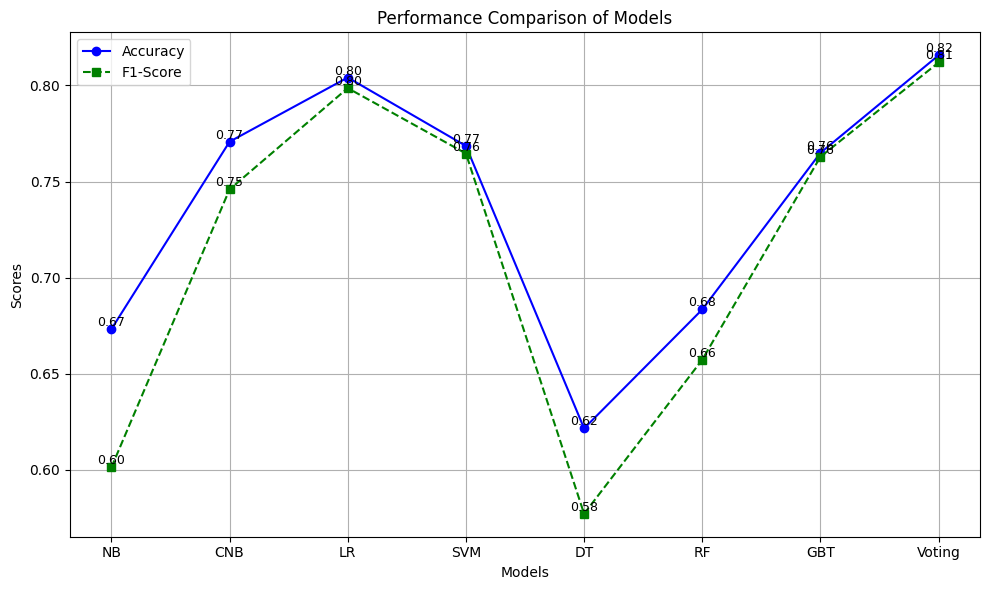

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 이름
models = ['NB', 'CNB', 'LR', 'SVM', 'DT', 'RF', 'GBT', 'Voting']

# 성능 데이터 (정확도와 F1-Score 입력) -> 이 부분 실제 값으로 수정 필요
accuracy = [0.6731967943009796, 0.7707034728406055, 0.8040961709706145, 0.7684772929652716, 0.6215494211932324, 0.6834372217275155, 0.7649154051647373, 0.8156723063223509]
f1_scores = [0.6012501291711391, 0.7458990404916549, 0.7985896600858042, 0.7645668915103504, 0.5771382931378932, 0.6573039658116424, 0.7628771594027134, 0.8119233115038695]

# 시각화
x = np.arange(len(models))

plt.figure(figsize=(10, 6))

# 최대 성능 모델
max_acc_idx = accuracy.index(max(accuracy))
max_f1_idx = f1_scores.index(max(f1_scores))

print("최대 정확도 모델:", models[max_acc_idx], "(정확도:", accuracy[max_acc_idx], ")")
print("최대 F1-Score 모델:", models[max_f1_idx], "(F1-Score:", f1_scores[max_f1_idx], ")")

# 선 그래프 추가
plt.plot(x, accuracy, marker='o', label='Accuracy', color='blue', linestyle='-')
plt.plot(x, f1_scores, marker='s', label='F1-Score', color='green', linestyle='--')

# 제목 및 축 설정
plt.title('Performance Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(x, models)  # 모델 이름 추가
plt.legend()

# 점수 표시
for i in range(len(models)):
    plt.text(i, accuracy[i], f'{accuracy[i]:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(i, f1_scores[i], f'{f1_scores[i]:.2f}', ha='center', va='bottom', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

#### 상위 5,000개 사용 결과 정리
- 최적 모델 1위 : Voting
  - 정확도: 0.8156723063223509
  - F1-Score: 0.8119233115038695

<br>

- 최적 모델 2위 : 로지스틱 회귀
  - 정확도: 0.8040961709706145
  - F1-Score: 0.7985896600858042

> # 👉 상위 5,000개 Result(0.8156)
- 최적 모델 : voting
- 정확도 : 0.8156

> 분석
- soft voting : 확률 평균화를 이용한 최적 모델 적용의 영향을 받아 가장 좋은 성능을 냄
- 로지스틱 회귀 : 텍스트 데이터에 강하고, 고차원 희소 데이터 형태인 경우에 아주 적합하기 때문으로 보임

<br>
<br>

## 3. 상위 10,000개 사용(이전 노드 기존 모델과 동일)

- 전처리

In [6]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

print(f'훈련 샘플 개수: {len(x_train)}')
print(f'테스트 샘플 개수: {len(x_test)}')
print(f'카테고리 수: {len(set(y_train))}')

max_len = max(len(seq) for seq in x_train)
print(f'최대 길이: {max_len}')

# TF-IDF
word_index = reuters.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = '[PAD]'
index_to_word[1] = '[START]'
index_to_word[2] = '[UNK]'

tokenizer = Tokenizer(num_words=10000)
x_train_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_train]
x_test_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_test]

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer.fit_transform(x_train_text)
x_test_tfidf = vectorizer.transform(x_test_text)

훈련 샘플 개수: 8982
테스트 샘플 개수: 2246
카테고리 수: 46
최대 길이: 2376


- ML 모델 적용

In [7]:
# 1. 나이브 베이즈 분류기
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
y_pred = nb.predict(x_test_tfidf)
print("나이브 베이즈 분류기 정확도:", accuracy_score(y_test, y_pred))
print("나이브 베이즈 분류기 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 2. CNB
cb = ComplementNB()
cb.fit(x_train_tfidf, y_train)
y_pred = cb.predict(x_test_tfidf)
print("CNB 정확도:", accuracy_score(y_test, y_pred))
print("CNB F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 3. 로지스틱 회귀
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_train_tfidf, y_train)
y_pred = lr.predict(x_test_tfidf)
print("로지스틱 회귀 정확도:", accuracy_score(y_test, y_pred))
print("로지스틱 회귀 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 4. 서포트 벡터 머신
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(x_train_tfidf, y_train)
y_pred = lsvc.predict(x_test_tfidf)
print("서포트 벡터 머신 정확도:", accuracy_score(y_test, y_pred))
print("서포트 벡터 머신 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 5. 결정 트리
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(x_train_tfidf, y_train)
y_pred = tree.predict(x_test_tfidf)
print("결정 트리 정확도:", accuracy_score(y_test, y_pred))
print("결정 트리 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 6. 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(x_train_tfidf, y_train)
y_pred = forest.predict(x_test_tfidf)
print("랜덤 포레스트 정확도:", accuracy_score(y_test, y_pred))
print("랜덤 포레스트 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 7. 그래디언트 부스팅 트리(verbose만 0으로 수정)
grbt = GradientBoostingClassifier(random_state=0, verbose=0) # 정보 표시 안함
grbt.fit(x_train_tfidf, y_train)
y_pred = grbt.predict(x_test_tfidf)
print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, y_pred))
print("그래디언트 부스팅 트리 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 8. 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(x_train_tfidf, y_train)
y_pred = voting_classifier.predict(x_test_tfidf)
print("보팅 정확도:", accuracy_score(y_test, y_pred))
print("보팅 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

나이브 베이즈 분류기 정확도: 0.6571682991985752
나이브 베이즈 분류기 F1-Score: 0.5768337297817889
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.70      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

로지스틱 회귀 정확도: 0.807212822796082
로지스틱 회귀 F1-Score: 0.8007323594633166
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.74      0.78      0.76       105
           2       0.71      0.75      0.73        20
           3       0.92      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.66      0.71      0.68        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.61      0.59      0.60        37
          14       0.67      1.00      0.80         2
          15       0.71      0.56      0.62         9
          16 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/s

서포트 벡터 머신 정확도: 0.7876224398931434
서포트 벡터 머신 F1-Score: 0.7833489000869941
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.74      0.73      0.74       105
           2       0.68      0.65      0.67        20
           3       0.91      0.91      0.91       813
           4       0.82      0.86      0.84       474
           5       0.00      0.00      0.00         5
           6       0.75      0.86      0.80        14
           7       0.50      0.33      0.40         3
           8       0.59      0.68      0.63        38
           9       0.78      0.84      0.81        25
          10       0.92      0.73      0.81        30
          11       0.65      0.75      0.70        83
          12       0.45      0.38      0.42        13
          13       0.57      0.57      0.57        37
          14       0.50      0.50      0.50         2
          15       0.56      0.56      0.56         9
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


랜덤 포레스트 정확도: 0.6869991095280499
랜덤 포레스트 F1-Score: 0.6599690321380312
              precision    recall  f1-score   support

           0       0.32      0.58      0.41        12
           1       0.41      0.74      0.53       105
           2       0.56      0.45      0.50        20
           3       0.84      0.90      0.87       813
           4       0.65      0.84      0.73       474
           5       0.00      0.00      0.00         5
           6       0.75      0.43      0.55        14
           7       0.50      0.33      0.40         3
           8       0.47      0.50      0.49        38
           9       0.60      0.48      0.53        25
          10       0.76      0.53      0.63        30
          11       0.64      0.67      0.65        83
          12       0.40      0.15      0.22        13
          13       0.45      0.27      0.34        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


그래디언트 부스팅 트리 정확도: 0.763579697239537
그래디언트 부스팅 트리 F1-Score: 0.7608595539590159
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.76      0.68      0.72       105
           2       0.78      0.70      0.74        20
           3       0.87      0.91      0.89       813
           4       0.76      0.82      0.79       474
           5       0.25      0.20      0.22         5
           6       0.75      0.86      0.80        14
           7       0.33      0.33      0.33         3
           8       0.65      0.63      0.64        38
           9       0.95      0.84      0.89        25
          10       0.86      0.83      0.85        30
          11       0.65      0.67      0.66        83
          12       0.43      0.46      0.44        13
          13       0.59      0.51      0.55        37
          14       0.07      0.50      0.12         2
          15       0.29      0.22      0.25         9
   

- 결과 시각화

최대 정확도 모델: Voting (정확도: 0.8116651825467498 )
최대 F1-Score 모델: Voting (F1-Score: 0.8088610827334295 )


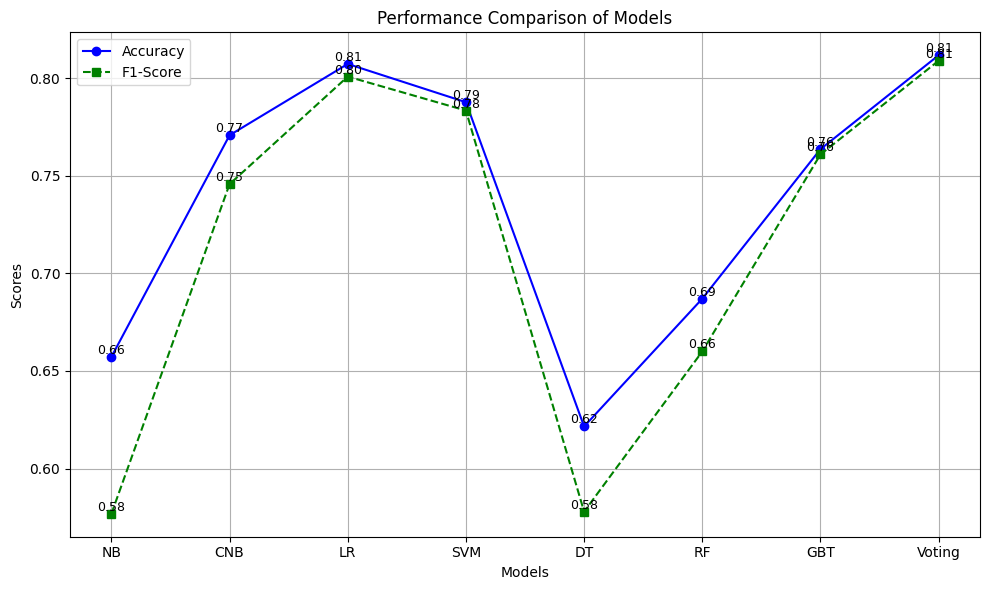

In [8]:
# 모델 이름
models = ['NB', 'CNB', 'LR', 'SVM', 'DT', 'RF', 'GBT', 'Voting']

# 성능 데이터 (정확도와 F1-Score 입력) -> 이 부분 실제 값으로 수정 필요
accuracy = [0.6571682991985752, 0.7707034728406055, 0.807212822796082, 0.7876224398931434, 0.6215494211932324, 0.6869991095280499, 0.763579697239537, 0.8116651825467498]
f1_scores = [0.5768337297817889, 0.7456682614453047, 0.8007323594633166, 0.7833489000869941, 0.5779297273317573, 0.6599690321380312, 0.7608595539590159, 0.8088610827334295]



# 시각화
x = np.arange(len(models))

plt.figure(figsize=(10, 6))

# 최대 성능 모델
max_acc_idx = accuracy.index(max(accuracy))
max_f1_idx = f1_scores.index(max(f1_scores))

print("최대 정확도 모델:", models[max_acc_idx], "(정확도:", accuracy[max_acc_idx], ")")
print("최대 F1-Score 모델:", models[max_f1_idx], "(F1-Score:", f1_scores[max_f1_idx], ")")

# 선 그래프 추가
plt.plot(x, accuracy, marker='o', label='Accuracy', color='blue', linestyle='-')
plt.plot(x, f1_scores, marker='s', label='F1-Score', color='green', linestyle='--')

# 제목 및 축 설정
plt.title('Performance Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(x, models)  # 모델 이름 추가
plt.legend()

# 점수 표시
for i in range(len(models)):
    plt.text(i, accuracy[i], f'{accuracy[i]:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(i, f1_scores[i], f'{f1_scores[i]:.2f}', ha='center', va='bottom', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

#### 상위 10,000개 사용 결과 정리
- 최적 모델 1위 : Voting
  - 정확도: 0.8116651825467498
  - F1-Score: 0.8088610827334295

<br>

- 최적 모델 2위 : 로지스틱 회귀
  - 정확도: 0.807212822796082
  - F1-Score: 0.8007323594633166

> # 👉 상위 10,000개 Result(0.8117)
- 최적 모델 : voting
- 정확도 : 0.8117

> 분석
- soft voting : 대체적으로 단어 개수 증가 -> 더 좋은 성능으로 이어짐
  - 다만, 전체 단어 사용 시보다 성능이 조금 더 좋은 부분은 모순
- 로지스틱 회귀 : 역시 단어 개수 증가 -> 더 좋은 성능
  - 이 역시, 전체단어 사용 시보다 성능이 조금 더 좋은 부분은 있음

<br>
<br>

## 4. 상위 1,000개 사용

In [9]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

print(f'훈련 샘플 개수: {len(x_train)}')
print(f'테스트 샘플 개수: {len(x_test)}')
print(f'카테고리 수: {len(set(y_train))}')

max_len = max(len(seq) for seq in x_train)
print(f'최대 길이: {max_len}')

# TF-IDF
word_index = reuters.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = '[PAD]'
index_to_word[1] = '[START]'
index_to_word[2] = '[UNK]'

tokenizer = Tokenizer(num_words=10000)
x_train_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_train]
x_test_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_test]

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer.fit_transform(x_train_text)
x_test_tfidf = vectorizer.transform(x_test_text)

훈련 샘플 개수: 8982
테스트 샘플 개수: 2246
카테고리 수: 46
최대 길이: 2376


In [10]:
# 1. 나이브 베이즈 분류기
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
y_pred = nb.predict(x_test_tfidf)
print("나이브 베이즈 분류기 정확도:", accuracy_score(y_test, y_pred))
print("나이브 베이즈 분류기 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 2. CNB
cb = ComplementNB()
cb.fit(x_train_tfidf, y_train)
y_pred = cb.predict(x_test_tfidf)
print("CNB 정확도:", accuracy_score(y_test, y_pred))
print("CNB F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 3. 로지스틱 회귀
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_train_tfidf, y_train)
y_pred = lr.predict(x_test_tfidf)
print("로지스틱 회귀 정확도:", accuracy_score(y_test, y_pred))
print("로지스틱 회귀 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 4. 서포트 벡터 머신
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(x_train_tfidf, y_train)
y_pred = lsvc.predict(x_test_tfidf)
print("서포트 벡터 머신 정확도:", accuracy_score(y_test, y_pred))
print("서포트 벡터 머신 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 5. 결정 트리
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(x_train_tfidf, y_train)
y_pred = tree.predict(x_test_tfidf)
print("결정 트리 정확도:", accuracy_score(y_test, y_pred))
print("결정 트리 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 6. 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(x_train_tfidf, y_train)
y_pred = forest.predict(x_test_tfidf)
print("랜덤 포레스트 정확도:", accuracy_score(y_test, y_pred))
print("랜덤 포레스트 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 7. 그래디언트 부스팅 트리(verbose만 0으로 수정)
grbt = GradientBoostingClassifier(random_state=0, verbose=0) # 정보 표시 안함
grbt.fit(x_train_tfidf, y_train)
y_pred = grbt.predict(x_test_tfidf)
print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, y_pred))
print("그래디언트 부스팅 트리 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 8. 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(x_train_tfidf, y_train)
y_pred = voting_classifier.predict(x_test_tfidf)
print("보팅 정확도:", accuracy_score(y_test, y_pred))
print("보팅 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

나이브 베이즈 분류기 정확도: 0.6856634016028496
나이브 베이즈 분류기 F1-Score: 0.6365070962972448
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.46      0.76      0.57       105
           2       0.00      0.00      0.00        20
           3       0.92      0.86      0.89       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.78      0.37      0.50        38
           9       0.91      0.40      0.56        25
          10       1.00      0.20      0.33        30
          11       0.44      0.81      0.57        83
          12       0.00      0.00      0.00        13
          13       1.00      0.11      0.20        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

로지스틱 회귀 정확도: 0.7475512021371327
로지스틱 회귀 F1-Score: 0.7414428935044836
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.64      0.70      0.67       105
           2       0.62      0.65      0.63        20
           3       0.88      0.90      0.89       813
           4       0.75      0.81      0.78       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.66      0.71      0.68        38
           9       0.74      0.80      0.77        25
          10       0.80      0.80      0.80        30
          11       0.54      0.66      0.60        83
          12       0.62      0.38      0.48        13
          13       0.46      0.57      0.51        37
          14       0.50      0.50      0.50         2
          15       0.57      0.44      0.50         9
          16

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


서포트 벡터 머신 정확도: 0.7195013357079252
서포트 벡터 머신 F1-Score: 0.7158252519264684
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.64      0.69      0.66       105
           2       0.39      0.35      0.37        20
           3       0.90      0.90      0.90       813
           4       0.75      0.80      0.77       474
           5       0.00      0.00      0.00         5
           6       0.75      0.86      0.80        14
           7       0.50      0.33      0.40         3
           8       0.51      0.66      0.57        38
           9       0.77      0.68      0.72        25
          10       0.91      0.70      0.79        30
          11       0.58      0.59      0.58        83
          12       0.50      0.38      0.43        13
          13       0.44      0.51      0.47        37
          14       1.00      0.50      0.67         2
          15       0.50      0.33      0.40         9
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


랜덤 포레스트 정확도: 0.719946571682992
랜덤 포레스트 F1-Score: 0.6929986429449428
              precision    recall  f1-score   support

           0       0.39      0.58      0.47        12
           1       0.49      0.77      0.60       105
           2       0.36      0.25      0.29        20
           3       0.85      0.92      0.88       813
           4       0.71      0.87      0.78       474
           5       0.00      0.00      0.00         5
           6       0.60      0.21      0.32        14
           7       0.40      0.67      0.50         3
           8       0.63      0.58      0.60        38
           9       0.75      0.72      0.73        25
          10       0.71      0.73      0.72        30
          11       0.66      0.69      0.67        83
          12       0.43      0.23      0.30        13
          13       0.41      0.32      0.36        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


그래디언트 부스팅 트리 정확도: 0.748886910062333
그래디언트 부스팅 트리 F1-Score: 0.7400845965883287
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.74      0.67      0.70       105
           2       0.57      0.40      0.47        20
           3       0.87      0.91      0.89       813
           4       0.75      0.85      0.79       474
           5       0.20      0.20      0.20         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.56      0.58      0.57        38
           9       0.83      0.76      0.79        25
          10       0.68      0.83      0.75        30
          11       0.64      0.65      0.65        83
          12       0.46      0.46      0.46        13
          13       0.54      0.51      0.53        37
          14       0.20      0.50      0.29         2
          15       0.50      0.22      0.31         9
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


보팅 정확도: 0.7849510240427426
보팅 F1-Score: 0.7776669696118362
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.76      0.77       105
           2       0.75      0.60      0.67        20
           3       0.91      0.94      0.93       813
           4       0.80      0.86      0.83       474
           5       0.33      0.20      0.25         5
           6       0.93      1.00      0.97        14
           7       1.00      0.33      0.50         3
           8       0.58      0.66      0.62        38
           9       0.81      0.84      0.82        25
          10       0.73      0.80      0.76        30
          11       0.62      0.70      0.66        83
          12       0.58      0.54      0.56        13
          13       0.55      0.57      0.56        37
          14       0.17      0.50      0.25         2
          15       0.75      0.33      0.46         9
          16       0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


최대 정확도 모델: Voting (정확도: 0.7849510240427426 )
최대 F1-Score 모델: Voting (F1-Score: 0.7776669696118362 )


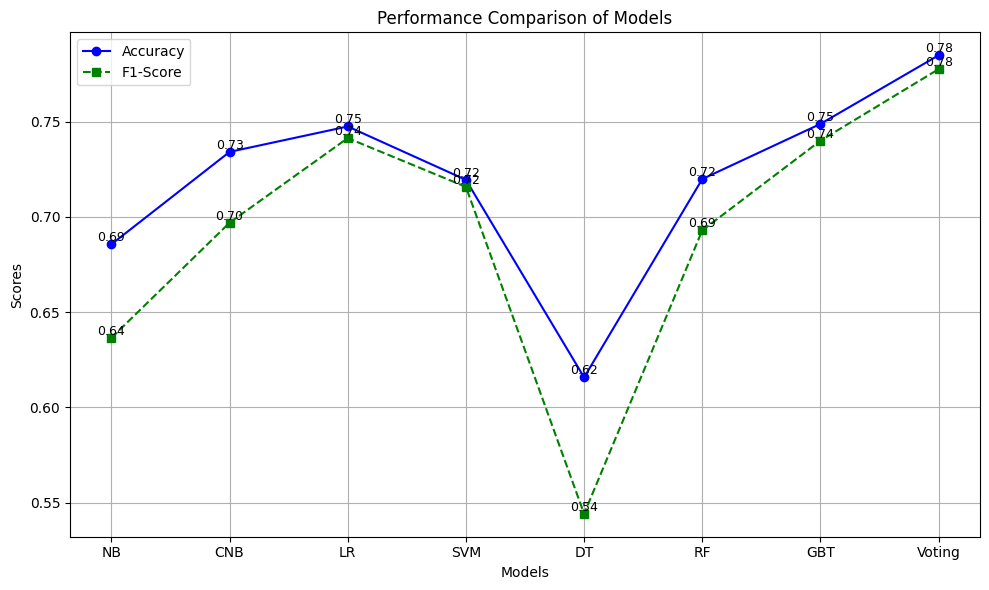

In [11]:
# 모델 이름
models = ['NB', 'CNB', 'LR', 'SVM', 'DT', 'RF', 'GBT', 'Voting']

# 성능 데이터 (정확도와 F1-Score 입력) -> 이 부분 실제 값으로 수정 필요
accuracy = [0.6856634016028496, 0.7341941228851291, 0.7475512021371327, 0.7195013357079252, 0.6157613535173642, 0.719946571682992, 0.74888691006233, 0.7849510240427426]
f1_scores = [0.6365070962972448, 0.6969839410688033, 0.7414428935044836, 0.7158252519264684, 0.5441092472643703, 0.6929986429449428, 0.7400845965883287, 0.7776669696118362]

# 시각화
x = np.arange(len(models))

plt.figure(figsize=(10, 6))

# 최대 성능 모델
max_acc_idx = accuracy.index(max(accuracy))
max_f1_idx = f1_scores.index(max(f1_scores))

print("최대 정확도 모델:", models[max_acc_idx], "(정확도:", accuracy[max_acc_idx], ")")
print("최대 F1-Score 모델:", models[max_f1_idx], "(F1-Score:", f1_scores[max_f1_idx], ")")

# 선 그래프 추가
plt.plot(x, accuracy, marker='o', label='Accuracy', color='blue', linestyle='-')
plt.plot(x, f1_scores, marker='s', label='F1-Score', color='green', linestyle='--')

# 제목 및 축 설정
plt.title('Performance Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(x, models)  # 모델 이름 추가
plt.legend()

# 점수 표시
for i in range(len(models)):
    plt.text(i, accuracy[i], f'{accuracy[i]:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(i, f1_scores[i], f'{f1_scores[i]:.2f}', ha='center', va='bottom', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

#### 상위 1,000개 사용 결과 정리
- 최적 모델 1위 : Voting
  - 정확도: 0.7849510240427426
  - F1-Score: 0.7776669696118362

<br>

- 최적 모델 2위 : 그래디언트 부스팅 트리
  - 정확도: 0.748886910062333
  - F1-Score: 0.7400845965883287

> # 👉 상위 1,000개 Result(0.7850)
- 최적 모델 : voting
- 정확도 : 0.7850

> 분석
- soft voting : 단어 개수 감소 -> 낮은 성능으로 일관성 유지됨
- 그래디언트 부스팅 트리 : 비선형 모델 -> 그러나, 단어 개수 자체가 크게 제한되어 데이터 양이 비교적 적은 상태에서 트리 기반 모델은 잘 작동될 가능성이 충분히 있었기 때문으로 추측
  - 다만, 로지스틱 회귀가 수치적으로 크게 차이가 나는 것은 아님..!!
<br>
<br>

## 5. 상위 3,000개 사용

In [12]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=3000, test_split=0.2)

print(f'훈련 샘플 개수: {len(x_train)}')
print(f'테스트 샘플 개수: {len(x_test)}')
print(f'카테고리 수: {len(set(y_train))}')

max_len = max(len(seq) for seq in x_train)
print(f'최대 길이: {max_len}')

# TF-IDF
word_index = reuters.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = '[PAD]'
index_to_word[1] = '[START]'
index_to_word[2] = '[UNK]'

tokenizer = Tokenizer(num_words=10000)
x_train_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_train]
x_test_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_test]

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer.fit_transform(x_train_text)
x_test_tfidf = vectorizer.transform(x_test_text)

훈련 샘플 개수: 8982
테스트 샘플 개수: 2246
카테고리 수: 46
최대 길이: 2376


In [13]:
# 1. 나이브 베이즈 분류기
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
y_pred = nb.predict(x_test_tfidf)
print("나이브 베이즈 분류기 정확도:", accuracy_score(y_test, y_pred))
print("나이브 베이즈 분류기 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 2. CNB
cb = ComplementNB()
cb.fit(x_train_tfidf, y_train)
y_pred = cb.predict(x_test_tfidf)
print("CNB 정확도:", accuracy_score(y_test, y_pred))
print("CNB F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 3. 로지스틱 회귀
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_train_tfidf, y_train)
y_pred = lr.predict(x_test_tfidf)
print("로지스틱 회귀 정확도:", accuracy_score(y_test, y_pred))
print("로지스틱 회귀 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 4. 서포트 벡터 머신
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(x_train_tfidf, y_train)
y_pred = lsvc.predict(x_test_tfidf)
print("서포트 벡터 머신 정확도:", accuracy_score(y_test, y_pred))
print("서포트 벡터 머신 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 5. 결정 트리
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(x_train_tfidf, y_train)
y_pred = tree.predict(x_test_tfidf)
print("결정 트리 정확도:", accuracy_score(y_test, y_pred))
print("결정 트리 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 6. 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(x_train_tfidf, y_train)
y_pred = forest.predict(x_test_tfidf)
print("랜덤 포레스트 정확도:", accuracy_score(y_test, y_pred))
print("랜덤 포레스트 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 7. 그래디언트 부스팅 트리(verbose만 0으로 수정)
grbt = GradientBoostingClassifier(random_state=0, verbose=0) # 정보 표시 안함
grbt.fit(x_train_tfidf, y_train)
y_pred = grbt.predict(x_test_tfidf)
print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, y_pred))
print("그래디언트 부스팅 트리 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 8. 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(x_train_tfidf, y_train)
y_pred = voting_classifier.predict(x_test_tfidf)
print("보팅 정확도:", accuracy_score(y_test, y_pred))
print("보팅 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

나이브 베이즈 분류기 정확도: 0.6874443455031166
나이브 베이즈 분류기 F1-Score: 0.6266285753419073
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.49      0.82      0.61       105
           2       0.00      0.00      0.00        20
           3       0.88      0.88      0.88       813
           4       0.64      0.95      0.76       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.48      0.65        25
          10       1.00      0.10      0.18        30
          11       0.44      0.76      0.56        83
          12       0.00      0.00      0.00        13
          13       0.70      0.19      0.30        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

로지스틱 회귀 정확도: 0.7898486197684773
로지스틱 회귀 F1-Score: 0.7837093542995051
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.74      0.76      0.75       105
           2       0.71      0.85      0.77        20
           3       0.89      0.92      0.91       813
           4       0.80      0.85      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.33      0.50         3
           8       0.64      0.74      0.68        38
           9       0.81      0.84      0.82        25
          10       0.93      0.83      0.88        30
          11       0.63      0.69      0.66        83
          12       0.62      0.38      0.48        13
          13       0.60      0.65      0.62        37
          14       0.50      0.50      0.50         2
          15       0.80      0.44      0.57         9
          16

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/s

서포트 벡터 머신 정확도: 0.7577916295636687
서포트 벡터 머신 F1-Score: 0.755348117450031
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.73      0.70      0.72       105
           2       0.70      0.70      0.70        20
           3       0.87      0.88      0.88       813
           4       0.78      0.80      0.79       474
           5       0.00      0.00      0.00         5
           6       0.81      0.93      0.87        14
           7       0.50      0.33      0.40         3
           8       0.60      0.68      0.64        38
           9       0.76      0.76      0.76        25
          10       0.78      0.83      0.81        30
          11       0.68      0.71      0.69        83
          12       0.43      0.46      0.44        13
          13       0.55      0.57      0.56        37
          14       0.33      0.50      0.40         2
          15       0.57      0.44      0.50         9
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


랜덤 포레스트 정확도: 0.6883348174532502
랜덤 포레스트 F1-Score: 0.6623532499614672
              precision    recall  f1-score   support

           0       0.38      0.42      0.40        12
           1       0.40      0.71      0.52       105
           2       0.50      0.55      0.52        20
           3       0.84      0.89      0.87       813
           4       0.67      0.86      0.76       474
           5       0.00      0.00      0.00         5
           6       0.71      0.36      0.48        14
           7       0.50      0.33      0.40         3
           8       0.54      0.58      0.56        38
           9       0.67      0.40      0.50        25
          10       0.80      0.40      0.53        30
          11       0.51      0.59      0.55        83
          12       0.33      0.15      0.21        13
          13       0.31      0.22      0.25        37
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         9
          16

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


그래디언트 부스팅 트리 정확도: 0.7649154051647373
그래디언트 부스팅 트리 F1-Score: 0.761043347098688
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.75      0.70      0.72       105
           2       0.76      0.65      0.70        20
           3       0.89      0.91      0.90       813
           4       0.76      0.84      0.80       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       0.20      0.33      0.25         3
           8       0.61      0.66      0.63        38
           9       0.81      0.84      0.82        25
          10       0.86      0.80      0.83        30
          11       0.65      0.66      0.65        83
          12       0.21      0.23      0.22        13
          13       0.53      0.43      0.48        37
          14       0.22      1.00      0.36         2
          15       0.50      0.22      0.31         9
   

최대 정확도 모델: Voting (정확도: 0.807212822796082 )
최대 F1-Score 모델: Voting (F1-Score: 0.8028020432619595 )


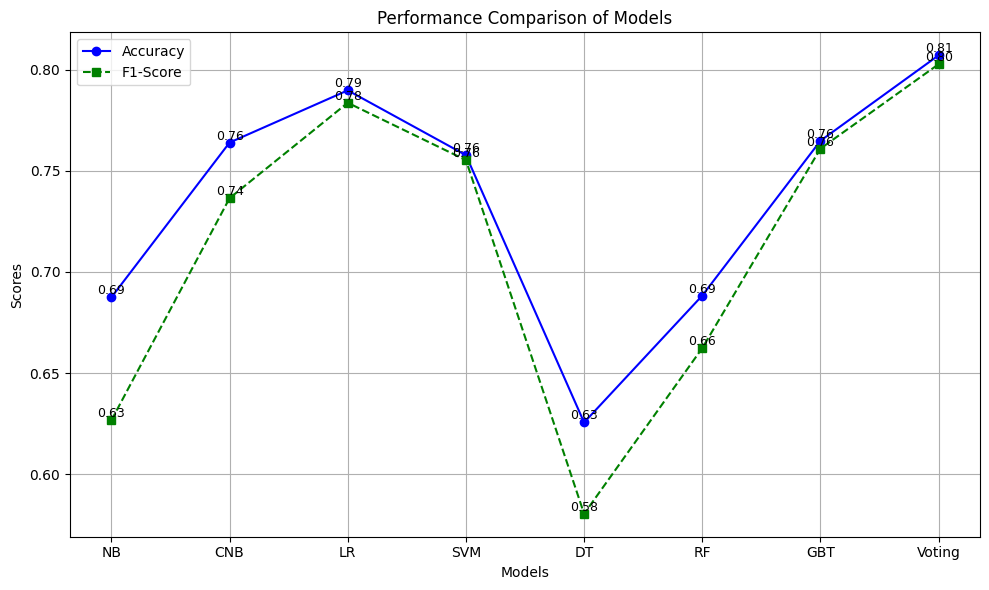

In [14]:
# 모델 이름
models = ['NB', 'CNB', 'LR', 'SVM', 'DT', 'RF', 'GBT', 'Voting']

# 성능 데이터 (정확도와 F1-Score 입력) -> 이 부분 실제 값으로 수정 필요
accuracy = [0.6874443455031166, 0.7640249332146037, 0.7898486197684773, 0.7577916295636687, 0.6255565449688335, 0.6883348174532502, 0.7649154051647373, 0.807212822796082]
f1_scores = [0.6266285753419073, 0.7365132640974913, 0.7837093542995051, 0.755348117450031, 0.5803804015504611, 0.6623532499614672, 0.761043347098688, 0.8028020432619595]

# 시각화
x = np.arange(len(models))

plt.figure(figsize=(10, 6))

# 최대 성능 모델
max_acc_idx = accuracy.index(max(accuracy))
max_f1_idx = f1_scores.index(max(f1_scores))

print("최대 정확도 모델:", models[max_acc_idx], "(정확도:", accuracy[max_acc_idx], ")")
print("최대 F1-Score 모델:", models[max_f1_idx], "(F1-Score:", f1_scores[max_f1_idx], ")")

# 선 그래프 추가
plt.plot(x, accuracy, marker='o', label='Accuracy', color='blue', linestyle='-')
plt.plot(x, f1_scores, marker='s', label='F1-Score', color='green', linestyle='--')

# 제목 및 축 설정
plt.title('Performance Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(x, models)  # 모델 이름 추가
plt.legend()

# 점수 표시
for i in range(len(models)):
    plt.text(i, accuracy[i], f'{accuracy[i]:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(i, f1_scores[i], f'{f1_scores[i]:.2f}', ha='center', va='bottom', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

#### 상위 3,000개 사용 결과 정리
- 최적 모델 1위 : Voting
  - 정확도: 0.807212822796082
  - F1-Score: 0.8028020432619595

<br>

- 최적 모델 2위 : 로지스틱 회귀
  - 정확도: 0.7898486197684773
  - F1-Score: 0.7837093542995051

> # 👉 상위 3,000개 Result(0.8072)
- 최적 모델 : voting
- 정확도 : 0.8072

> 분석
- soft voting : 이전 1,000개와 비교할 경우 단어 개수가 증가하면 -> 성능이 높아짐을 또다시 증명함
- 로지스틱 회귀 : 전체 단어를 사용한 경우가 현재 성능이 가장 좋으며, 1,000개와 비교하면 성능이 향상됨
  - 이 역시, 단어 개수의 증가가 성능에 positive한 영향을 미침을 미루어 짐작할 수 있게 함

- LR 모델이 선형 데이터에 특히나 강력하며, 그 강력함이 일부 들어간 보팅의 성능이 좋게 나오는 것으로 보임

<br>
<br>

# 6. 상위 7,000개 사용

In [15]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=7000, test_split=0.2)

print(f'훈련 샘플 개수: {len(x_train)}')
print(f'테스트 샘플 개수: {len(x_test)}')
print(f'카테고리 수: {len(set(y_train))}')

max_len = max(len(seq) for seq in x_train)
print(f'최대 길이: {max_len}')

# TF-IDF
word_index = reuters.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = '[PAD]'
index_to_word[1] = '[START]'
index_to_word[2] = '[UNK]'

tokenizer = Tokenizer(num_words=10000)
x_train_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_train]
x_test_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_test]

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer.fit_transform(x_train_text)
x_test_tfidf = vectorizer.transform(x_test_text)

훈련 샘플 개수: 8982
테스트 샘플 개수: 2246
카테고리 수: 46
최대 길이: 2376


In [16]:
# 1. 나이브 베이즈 분류기
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
y_pred = nb.predict(x_test_tfidf)
print("나이브 베이즈 분류기 정확도:", accuracy_score(y_test, y_pred))
print("나이브 베이즈 분류기 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 2. CNB
cb = ComplementNB()
cb.fit(x_train_tfidf, y_train)
y_pred = cb.predict(x_test_tfidf)
print("CNB 정확도:", accuracy_score(y_test, y_pred))
print("CNB F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 3. 로지스틱 회귀
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_train_tfidf, y_train)
y_pred = lr.predict(x_test_tfidf)
print("로지스틱 회귀 정확도:", accuracy_score(y_test, y_pred))
print("로지스틱 회귀 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 4. 서포트 벡터 머신
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(x_train_tfidf, y_train)
y_pred = lsvc.predict(x_test_tfidf)
print("서포트 벡터 머신 정확도:", accuracy_score(y_test, y_pred))
print("서포트 벡터 머신 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 5. 결정 트리
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(x_train_tfidf, y_train)
y_pred = tree.predict(x_test_tfidf)
print("결정 트리 정확도:", accuracy_score(y_test, y_pred))
print("결정 트리 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 6. 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(x_train_tfidf, y_train)
y_pred = forest.predict(x_test_tfidf)
print("랜덤 포레스트 정확도:", accuracy_score(y_test, y_pred))
print("랜덤 포레스트 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 7. 그래디언트 부스팅 트리(verbose만 0으로 수정)
grbt = GradientBoostingClassifier(random_state=0, verbose=0) # 정보 표시 안함
grbt.fit(x_train_tfidf, y_train)
y_pred = grbt.predict(x_test_tfidf)
print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, y_pred))
print("그래디언트 부스팅 트리 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# 8. 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(x_train_tfidf, y_train)
y_pred = voting_classifier.predict(x_test_tfidf)
print("보팅 정확도:", accuracy_score(y_test, y_pred))
print("보팅 F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

나이브 베이즈 분류기 정확도: 0.6647373107747105
나이브 베이즈 분류기 F1-Score: 0.5868002697510343
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.56      0.76      0.65       105
           2       0.00      0.00      0.00        20
           3       0.84      0.89      0.86       813
           4       0.55      0.95      0.70       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.16      0.28        25
          10       0.00      0.00      0.00        30
          11       0.53      0.69      0.60        83
          12       0.00      0.00      0.00        13
          13       1.00      0.05      0.10        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

로지스틱 회귀 정확도: 0.804986642920748
로지스틱 회귀 F1-Score: 0.7986859407463737
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.78      0.77       105
           2       0.71      0.75      0.73        20
           3       0.91      0.94      0.92       813
           4       0.81      0.86      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.63      0.68      0.66        38
           9       0.81      0.88      0.85        25
          10       0.96      0.87      0.91        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.66      0.62      0.64        37
          14       0.67      1.00      0.80         2
          15       0.80      0.44      0.57         9
          16 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/s

서포트 벡터 머신 정확도: 0.7791629563668745
서포트 벡터 머신 F1-Score: 0.7750626285542532
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.68      0.70      0.69       105
           2       0.67      0.70      0.68        20
           3       0.90      0.91      0.90       813
           4       0.81      0.84      0.82       474
           5       0.50      0.20      0.29         5
           6       0.88      1.00      0.93        14
           7       0.67      0.67      0.67         3
           8       0.59      0.71      0.64        38
           9       0.81      0.84      0.82        25
          10       0.83      0.83      0.83        30
          11       0.67      0.75      0.70        83
          12       0.45      0.38      0.42        13
          13       0.57      0.57      0.57        37
          14       0.50      1.00      0.67         2
          15       0.33      0.22      0.27         9
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


랜덤 포레스트 정확도: 0.6767586821015138
랜덤 포레스트 F1-Score: 0.6492975275472811
              precision    recall  f1-score   support

           0       0.28      0.42      0.33        12
           1       0.37      0.67      0.47       105
           2       0.31      0.20      0.24        20
           3       0.81      0.90      0.85       813
           4       0.68      0.82      0.74       474
           5       0.00      0.00      0.00         5
           6       0.50      0.21      0.30        14
           7       0.33      0.33      0.33         3
           8       0.56      0.47      0.51        38
           9       0.88      0.60      0.71        25
          10       0.36      0.13      0.20        30
          11       0.52      0.61      0.56        83
          12       0.40      0.15      0.22        13
          13       0.42      0.35      0.38        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


그래디언트 부스팅 트리 정확도: 0.761353517364203
그래디언트 부스팅 트리 F1-Score: 0.7592272371687793
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.68      0.71       105
           2       0.78      0.70      0.74        20
           3       0.89      0.90      0.89       813
           4       0.75      0.82      0.79       474
           5       0.33      0.20      0.25         5
           6       0.80      0.86      0.83        14
           7       1.00      0.33      0.50         3
           8       0.56      0.63      0.59        38
           9       0.91      0.80      0.85        25
          10       0.93      0.87      0.90        30
          11       0.63      0.70      0.66        83
          12       0.31      0.31      0.31        13
          13       0.62      0.49      0.55        37
          14       0.14      1.00      0.25         2
          15       0.33      0.22      0.27         9
   

최대 정확도 모델: Voting (정확도: 0.8156723063223509 )
최대 F1-Score 모델: Voting (F1-Score: 0.8119394665362002 )


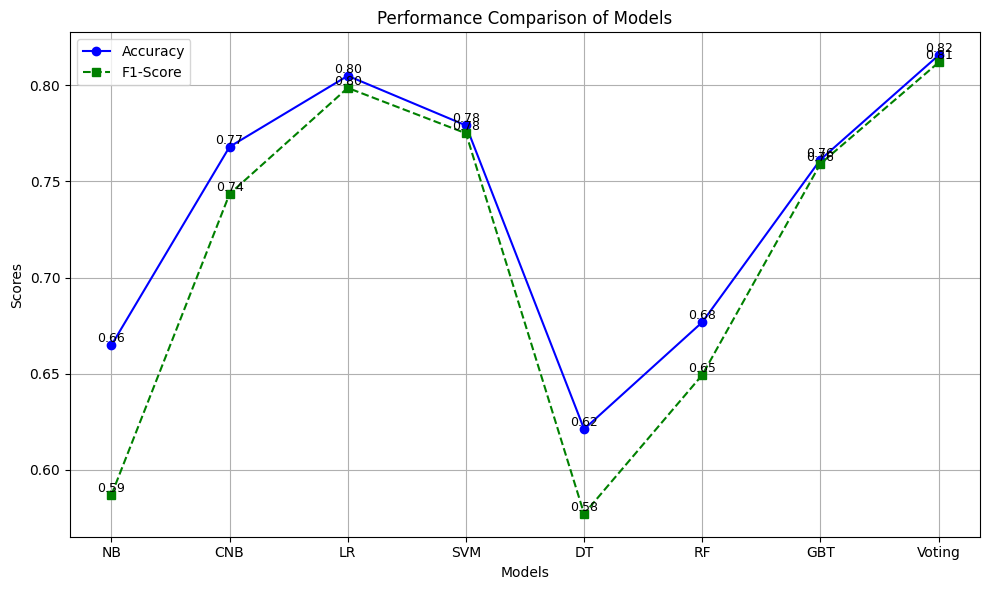

In [17]:
# 모델 이름
models = ['NB', 'CNB', 'LR', 'SVM', 'DT', 'RF', 'GBT', 'Voting']

# 성능 데이터 (정확도와 F1-Score 입력) -> 이 부분 실제 값으로 수정 필요
accuracy = [0.6647373107747105, 0.7680320569902048, 0.804986642920748, 0.7791629563668745, 0.6211041852181657, 0.6767586821015138, 0.761353517364203, 0.8156723063223509]
f1_scores = [0.5868002697510343, 0.7434863997799732, 0.7986859407463737, 0.7750626285542532, 0.5770254896687419, 0.6492975275472811, 0.7592272371687793, 0.8119394665362002]

# 시각화
x = np.arange(len(models))

plt.figure(figsize=(10, 6))

# 최대 성능 모델
max_acc_idx = accuracy.index(max(accuracy))
max_f1_idx = f1_scores.index(max(f1_scores))

print("최대 정확도 모델:", models[max_acc_idx], "(정확도:", accuracy[max_acc_idx], ")")
print("최대 F1-Score 모델:", models[max_f1_idx], "(F1-Score:", f1_scores[max_f1_idx], ")")

# 선 그래프 추가
plt.plot(x, accuracy, marker='o', label='Accuracy', color='blue', linestyle='-')
plt.plot(x, f1_scores, marker='s', label='F1-Score', color='green', linestyle='--')

# 제목 및 축 설정
plt.title('Performance Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(x, models)  # 모델 이름 추가
plt.legend()

# 점수 표시
for i in range(len(models)):
    plt.text(i, accuracy[i], f'{accuracy[i]:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(i, f1_scores[i], f'{f1_scores[i]:.2f}', ha='center', va='bottom', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

#### 상위 7,000개 사용 결과 정리
- 최적 모델 1위 : Voting
  - 정확도: 0.8156723063223509
  - F1-Score: 0.8119394665362002

<br>

- 최적 모델 2위 : 로지스틱 회귀
  - 정확도: 0.804986642920748
  - F1-Score: 0.7986859407463737

> # 👉 상위 7,000개 Result(0.8157)
- 최적 모델 : voting
- 정확도 : 0.8157

> 분석
- soft voting : 이전 3,000개와 비교했을 경우 단어 개수 증가가 성능 향상에 영향을 미침을 확인 가능
  - 다만, 개수가 더 많은 경우인 10,000개와 전체 단어보다 성능이 좋게 나오는 모순이 있었음
  - 그러나 큰 차이는 없었기 때문에 성능의 증가 추세는 유지되고 있다고 봐도 무방할 것
- 로지스틱 회귀 : 이전 3,000개와 비교하면 성능이 향상되었으며 단어 개수가 많아질수록 성능이 올라감을 더 명확히 볼 수 있는 모델
  - 데이터셋에 가장 fit한 경우임을 알 수 있음.
  - 보팅의 경우, 비율에 따라 조금씩 달라질 수 있기 때문에 신뢰도가 아주 조금 떨어지는 것을 판단

<br>
<br>

<br>

# Vocabulary size 증가에 따른 성능 추이를 기준으로 한 결과 분석

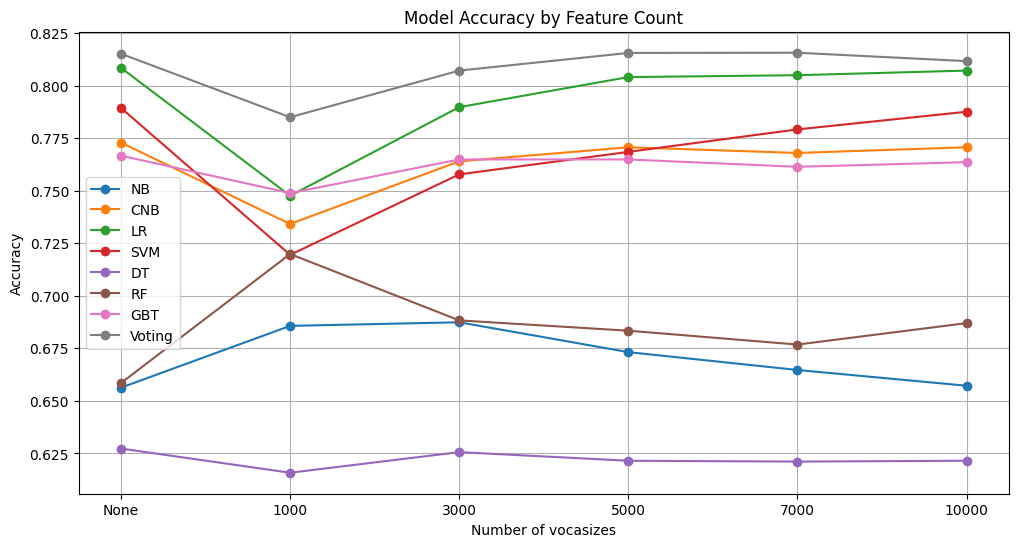

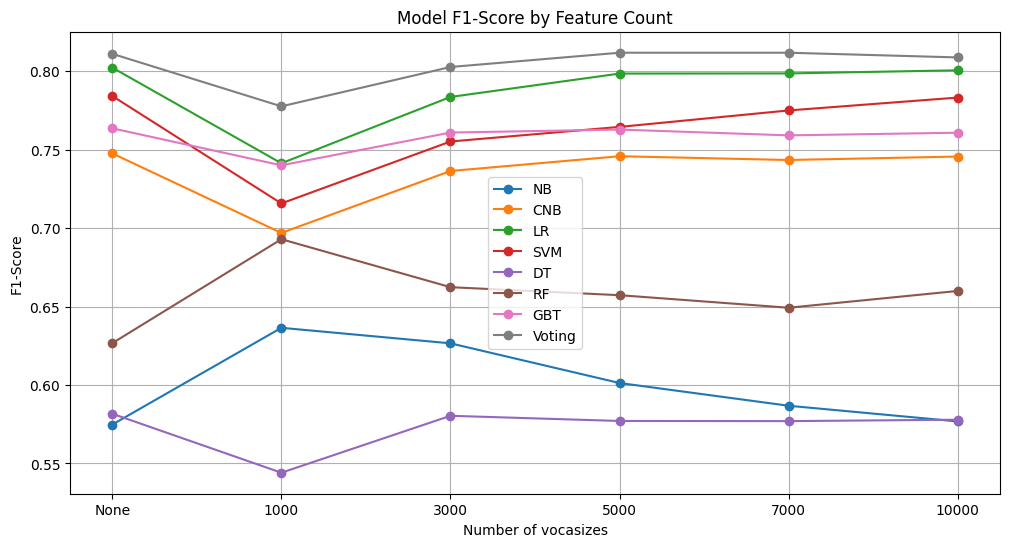

Optimal Model based on Accuracy: Voting with 7000 vocsizes
Optimal Model based on F1-Score: Voting with 7000 vocsizes


In [22]:
models = ['NB', 'CNB', 'LR', 'SVM', 'DT', 'RF', 'GBT', 'Voting']
vocasizes = ['None', '1000', '3000', '5000', '7000', '10000']

# Accuracy
accuracy = [
    [0.6563, 0.6857, 0.6874, 0.6732, 0.6647, 0.6572],
    [0.7729, 0.7342, 0.7640, 0.7707, 0.7680, 0.7707],
    [0.8085, 0.7476, 0.7898, 0.8041, 0.8050, 0.8072],
    [0.7894, 0.7195, 0.7578, 0.7685, 0.7792, 0.7876],
    [0.6273, 0.6158, 0.6256, 0.6215, 0.6211, 0.6215],
    [0.6585, 0.7199, 0.6883, 0.6834, 0.6768, 0.6870],
    [0.7667, 0.7489, 0.7649, 0.7649, 0.7614, 0.7636],
    [0.8152, 0.7850, 0.8072, 0.8156, 0.8157, 0.8117]
]

# F1-Score
f1_score = [
    [0.5748, 0.6365, 0.6266, 0.6013, 0.5868, 0.5768],
    [0.7477, 0.6970, 0.7365, 0.7459, 0.7435, 0.7457],
    [0.8024, 0.7414, 0.7837, 0.7986, 0.7987, 0.8007],
    [0.7843, 0.7158, 0.7553, 0.7646, 0.7751, 0.7833],
    [0.5817, 0.5441, 0.5804, 0.5771, 0.5770, 0.5779],
    [0.6267, 0.6930, 0.6624, 0.6573, 0.6493, 0.6600],
    [0.7637, 0.7401, 0.7610, 0.7629, 0.7592, 0.7609],
    [0.8112, 0.7777, 0.8028, 0.8119, 0.8119, 0.8089]
]

# Plot Accuracy
plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    plt.plot(vocasizes, accuracy[i], marker='o', label=model)
plt.title('Model Accuracy by Feature Count')
plt.xlabel('Number of vocasizes')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot F1-Score
plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    plt.plot(vocasizes, f1_score[i], marker='o', label=model)
plt.title('Model F1-Score by Feature Count')
plt.xlabel('Number of vocasizes')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()

# Print Optimal Model and Features
best_model_acc = models[7]  # Voting model
best_vocasizes_acc = vocasizes[4]  # 7000 features

best_model_f1 = models[7]  # Voting model
best_vocasizes_f1 = vocasizes[4]  # 7000 features

print(f'Optimal Model based on Accuracy: {best_model_acc} with {best_vocasizes_acc} vocsizes')
print(f'Optimal Model based on F1-Score: {best_model_f1} with {best_vocasizes_f1} vocsizes')

- 단어 사이즈 기준
  - 모든 단어(None)
  - 상위 1,000개
  - 상위 3,000개
  - 상위 5,000개
  - 상위 7,000개
  - 상위 10,000개

<br>

- Accuracy 기준

| ML 모델 | None | 1000 | 3000 | 5000 | 7000 | 10000 |
|--------|------|------|------|------|------|-------|
| NB     | 0.6563 | 0.6857 |0.6874| 0.6732 |0.6647| 0.6572|
| CNB    | 0.7729 | 0.7342 |0.7640| 0.7707 |0.7680| 0.7707|
| LR     | 0.8085 | 0.7476 |0.7898| 0.8041 |0.8050| 0.8072|
| SVM    | 0.7894 | 0.7195 |0.7578| 0.7685 |0.7792| 0.7876|
| DT     | 0.6273 | 0.6158 |0.6256| 0.6215 |0.6211| 0.6215|
| RF     | 0.6585 | 0.7199 |0.6883| 0.6834 |0.6768| 0.6870|
| GBT    | 0.7667 | 0.7489 |0.7649| 0.7649 |0.7614| 0.7636|
| Voting | **0.8152** | **0.7850** |**0.8072**| **0.8156** |**0.8157**|**0.8117** |

<br>

- F1-score 기준

| ML 모델 | None | 1000 | 3000 | 5000 | 7000 | 10000 |
|--------|------|------|------|------|------|------|
| NB     | 0.5748 | 0.6365 |0.6266| 0.6013 |0.5868|0.5768|
| CNB    | 0.7477 | 0.6970 |0.7365| 0.7459 |0.7435|0.7457|
| LR     | 0.8024 | 0.7414 |0.7837| 0.7986 |0.7987|0.8007|
| SVM    | 0.7843 | 0.7158 |0.7553| 0.7646 |0.7751|0.7833|
| DT     | 0.5817 | 0.5441 |0.5804| 0.5771 |0.5770|0.5779|
| RF     | 0.6267 | 0.6930 |0.6624| 0.6573 |0.6493|0.6600|
| GBT    | 0.7637 | 0.7401 |0.7610| 0.7629 |0.7592|0.7609|
| Voting | **0.8112** | **0.7777** |**0.8028**| **0.8119** |**0.8119**|**0.8089** |


<br>

# 🎄 최종 결론 : 최적 모델은 Voting, 최적 단어 개수는 7,000개
1️⃣ **데이터셋 특성에 적합한** ML 모델을 사용했을 경우, 단어 개수 증가 ➡️ 성능의 증가 추이가 유지되는 경향성을 보임
  - 다만, 아주 근소한 차이로 예외가 있었으나 전체 단어를 기준으로 성능 증가 추이가 발생했다고 봐도 무방할 정도로 보임!
  - 고차원 희소 데이터의 과적합 방지 및 분류 경계 설정만 잘하면 성능을 더 올릴 수 있을 것으로 판단
  - 또한, 단어 개수 즉 feature의 수가 증가함에도 성능 저하없이 일정한 정확도 및 f1-score를 유지했기 때문에 일관성이 잘 유지됨!


<br>

2️⃣ Voting 모델이 가장 성능이 좋았고, 로지스틱 회귀가 그 다음으로 성능이 좋은 경우가 대체적으로 많았음
  - Voting의 경우 성능이 좋은 경우를 확률 평균화를 통해 사용하기 때문에 자연히 가장 좋은 결과를 내는 것으로 판단
    - 개별 모델들의 장점을 결합하는 방식이기에 보완적 효과가 발생한 것으로 보임
    - 또한, 고차원 희소 데이터에서도 꽤 안정적으로 성능을 유지함
  - 로지스틱 회귀의 경우 고차원 희소 데이터의 형태를 띄는 현재의 데이터셋에 가장 적합한 모델이기 때문에 성능은 근소하게 작았으나, 증가 추이가 가장 잘 유지되었음!
    - L2 정규화 및 확률적 예측이 내부에서 실행되기 때문에 희소 데이터가 강한 특성이 있음
    - 선형 결정 경게가 잘 구현되어 텍스트 분류에서 특히 강점을 발휘한 것으로 보임


<br>
<br>

# DL 모델과의 비교(선택사항)
- 최적 ML 모델 및 단어 수 조건 : voting, 7,000개
  - 전처리 조건 : TF-IDF 변환 동일하게 진행, 다만 차원을 추가해서 입력 요구사항을 맞춰야 함
- 1-D CNN 모델 사용

In [26]:
# 전처리 코드 재활용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=7000, test_split=0.2)

print(f'훈련 샘플 개수: {len(x_train)}')
print(f'테스트 샘플 개수: {len(x_test)}')
print(f'카테고리 수: {len(set(y_train))}')

max_len = max(len(seq) for seq in x_train)
print(f'최대 길이: {max_len}')

# TF-IDF
word_index = reuters.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = '[PAD]'
index_to_word[1] = '[START]'
index_to_word[2] = '[UNK]'

tokenizer = Tokenizer(num_words=10000)
x_train_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_train]
x_test_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_test]

vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer.fit_transform(x_train_text)
x_test_tfidf = vectorizer.transform(x_test_text)

y_train_cat = to_categorical(y_train, num_classes=46)
y_test_cat = to_categorical(y_test, num_classes=46)

훈련 샘플 개수: 8982
테스트 샘플 개수: 2246
카테고리 수: 46
최대 길이: 2376


In [29]:
# 1D CNN 모델 코드
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout, Embedding
from tensorflow.keras.datasets import reuters

# 모델 구성
model = Sequential()
model.add(Conv1D(128, kernel_size=5, activation='relu', input_shape=(x_train_tfidf.shape[1], 1)))  # 입력 크기 수정
model.add(GlobalMaxPooling1D())  # 최대 풀링
model.add(Dropout(0.5))  # 드롭아웃
model.add(Dense(46, activation='softmax'))  # 출력층 (46개 클래스)

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(x_train_tfidf, y_train_cat, epochs=10, batch_size=64, validation_data=(x_test_tfidf, y_test_cat))

# 성능 평가
loss, accuracy = model.evaluate(x_test_tfidf, y_test_cat)
print(f"정확도: {accuracy}")

# 예측 및 평가
y_pred = model.predict(x_test_tfidf)
y_pred_class = np.argmax(y_pred, axis=1)  # 가장 높은 확률을 가진 클래스를 예측 결과로 선택

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.2695 - loss: 3.3859 - val_accuracy: 0.3620 - val_loss: 2.4174
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.3463 - loss: 2.4168 - val_accuracy: 0.3620 - val_loss: 2.4093
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 172s 868ms/step - accuracy: 0.3347 - loss: 2.4149 - val_accuracy: 0.3620 - val_loss: 2.4074
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 142s 869ms/step - accuracy: 0.3519 - loss: 2.4055 - val_accuracy: 0.3620 - val_loss: 2.4068
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 124s 878ms/step - accuracy: 0.3366 - loss: 2.4522 - val_accuracy: 0.3620 - val_loss: 2.4067
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 123s 872ms/step - accuracy: 0.3481 - loss: 2.3848 - val_accuracy: 0.3620 - val_loss: 2.4048
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 124s 882ms/step - accuracy: 0.3471 - loss: 2.4028 - val_accuracy: 0.3620 - val_loss: 2.4051
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 134s 950ms/step - accuracy: 0.3626 - loss:

- 성능 확인

In [30]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

print("정확도:", accuracy_score(y_test, y_pred_class))
print("F1-Score:", f1_score(y_test, y_pred_class, average='weighted'))
print(classification_report(y_test, y_pred_class))

정확도: 0.3619768477292965
F1-Score: 0.19240743851187844
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        20
           3       0.36      1.00      0.53       813
           4       0.00      0.00      0.00       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<br>
<br>

## **최적 ML 모델** vs DL 모델
> 전제 : 동일한 전처리 환경 및 단어 개수 사용한 경우임
- 최적 ML 모델이 80% 이상의 성능을 내는 데에 비해, DL 모델의 경우 30%대의 아주 낮은 성능을 보임
  - TF-IDF vs CNN
    - 단어 빈도와 역빈도 기반 고정 feature 벡터를 사용하는데, CNN은 공간적 특성과 순차적 특성 추출에 더 적합한 모델이기 때문에, 텍스트 데이터의 feature 추출 방식과 TF-IDF의 feature 추출 방식이 같지 않다면, 모델 성능이 저하될 것으로 봄
  - 임베딩 미사용
    - 이전 전처리와 동일하게 적용하기 위해 임베딩을 사용하지 않았기 때문에 해당 레이어가 없어 텍스트 의미를 이해할 수 없는 문제가 있음
  - 학습 시간 및 에폭 수 부족
    - 데이터가 상대적으로 더 많이 필요한 딥러닝 모델이기 때문에 성능 저하에 어느정도 영향이 있었을 것으로 보임

<br>
<br>

<br>

# 회고


이번 뉴스 카테고리 다중 분류 프로젝트를 진행하면서 크게 3가지에 대해서 알 수 있었습니다.
- 특징적 요소 : 모든 단어 사이즈를 모두 고려하여도, 대체적으로 보팅이 성능이 가장 좋았으며 그 다음으로는 로지스틱 회귀가 가장 좋은 성능을 보인다.
- ML 모델 특성 : 데이터셋이 가진 특성(고차원 희소 데이터, 데이터 불균형)을 잘 반영할 수 있는 적합 모델을 사용하면 성능 증가 추이가 잘 유지된다.
- DL 모델 선택 : 과적합을 주의해서 모델을 설계해서 적용했지만 DL 모델이라고 해서 성능이 크게 향상되거나 좋아지지는 않는다.

<br>

그 이유에 대해서는 최종 결론 부분에서도 일부 기술했지만, 다시한번 짚어보자면 다음과 같다고 생각합니다.
- 로이터 뉴스 데이터셋의 특성
  - 고차원 희소 데이터
    - 대부분의 단어가 문서에서 1번 정도 등장한다.
    - 전체 단어 대비 실제 사용되는 단어의 비율이 낮다(희소성).
  - 클래스 불균형 문제
    - 일부 클래스에 데이터 집중되어 있어, 특정 클래스 샘플 수가 매우 적다.
    - 불균형한 구조를 가지고 있기 때문에 규제가 강한 ML 모델일수록 과적합이 방지되고 성능이 안정적으로 나온다.

<br>

즉, 결국 데이터셋의 특성을 잘 반영할수록 좋은 성능을 보인다는 결론을 내릴 수 있었어요☺️
<br>

아쉬운 점들도 많았는데요.
<br>
시간적 여유가 조금 더 있었다면 각 모델의 결과를 로그 파일로 저장하거나, 모든 경우를 각각 함수 처리하여 한꺼번에 실행해 저장했다면 시각화를 조금 더 코드적으로 진행할 수 있었을 것 같아서 조금 아쉬운 것 같습니다.
<br>
그리고, 현재의 시각화는 결과를 바탕으로 손으로 작성한 것에 가까워, 코드를 이용하는 방식에 대해서 고민을 더 해봤습니다.
(부록으로 코드만 작성했고, 시간상의 이유로 실행은 하지 못했어요..)

<br>

그래도 전반적으로 봤을 때 이전보다 확실히 ML 모델의 사용 이유를 잘 이해하고 있고, 어떤 부분을 바꿔야 성능에 좋은 영향이 미칠지에 대해서 더 고민해볼 수 있게 된 것 같아 다행이라고 생각합니다.

<br>

다음에는, 더 다양한 경우를 고려해서 더 짜임새 있는 프로젝트를 진행해보고 싶어요..!

<br>
<br>
<br>
<br>

---

# Appendix

## 1. ML 모델에서의 자동화 및 시각화 적용할 경우의 코드

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.datasets import reuters

# 데이터 로드
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
word_index = reuters.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = '[PAD]'
index_to_word[1] = '[START]'
index_to_word[2] = '[UNK]'

# 단어 개수별 성능 평가
word_counts = [None, 1000, 2000, 3000, 5000, 7000, 10000]
results = []

# 모델 리스트
models = [
    ("Naive Bayes", MultinomialNB()),
    ("Complement Naive Bayes", ComplementNB()),
    ("Logistic Regression", LogisticRegression(C=10000, penalty='l2', max_iter=3000)),
    ("Linear SVC", LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=10, random_state=0)),
    ("Random Forest", RandomForestClassifier(n_estimators=5, random_state=0)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=0, verbose=0)),
    ("Voting Classifier", VotingClassifier(estimators=[
        ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
    ], voting='soft', n_jobs=-1))
]

# 단어 개수별 모델 평가
for num_words in word_counts:
    tokenizer = Tokenizer(num_words=num_words)
    x_train_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_train]
    x_test_text = [' '.join([index_to_word[idx] for idx in seq]) for seq in x_test]

    vectorizer = TfidfVectorizer(max_features=num_words if num_words else None)
    x_train_tfidf = vectorizer.fit_transform(x_train_text)
    x_test_tfidf = vectorizer.transform(x_test_text)

    for model_name, model in models:
        model.fit(x_train_tfidf, y_train)
        y_pred = model.predict(x_test_tfidf)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append((num_words, model_name, accuracy, f1, x_train_tfidf.shape[1]))

# 결과를 DataFrame으로 저장
df_results = pd.DataFrame(results, columns=['Num_Words', 'Model', 'Accuracy', 'F1-Score', 'Total_Words'])

# 최고 성능 모델 출력
best_model = df_results.loc[df_results['Accuracy'].idxmax()]
print(f"\n최고 성능 모델: {best_model['Model']} (단어 개수: {best_model['Num_Words']})")
print(f"정확도: {best_model['Accuracy']}")
print(f"F1-Score: {best_model['F1-Score']}")
print(f"전체 단어 개수: {best_model['Total_Words']}")

# 성능 시각화
plt.figure(figsize=(10, 6))
for model_name in df_results['Model'].unique():
    model_data = df_results[df_results['Model'] == model_name]
    plt.plot(model_data['Num_Words'], model_data['Accuracy'], marker='o', label=f'{model_name} Accuracy')
    plt.plot(model_data['Num_Words'], model_data['F1-Score'], marker='x', label=f'{model_name} F1-Score')

plt.xlabel('단어 개수')
plt.ylabel('점수')
plt.title('모델별 단어 개수에 따른 성능 변화')
plt.legend()
plt.grid(True)
plt.show()

## 2. 로그 파일 저장 형식으로 부분 자동화할 경우

In [ ]:
import logging

# 로그 설정
log_file_path = '/content/execution_log.txt'

logging.basicConfig(
    filename=log_file_path,  # 로그 파일 경로
    level=logging.INFO,  # 로그 레벨 설정 (INFO 이상부터 기록)
    format='%(asctime)s - %(message)s'  # 로그 메시지 형식
)

# 출력 내용을 로그에 기록하는 함수
def log_output(output):
    logging.info(output)
    print(output)  # 콘솔 출력도 유지

In [ ]:
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
y_pred = nb.predict(x_test_tfidf)

# 결과 출력
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
output = f"Naive Bayes 모델 성능:\n정확도: {accuracy}\nF1-Score: {f1}\n{classification_report(y_test, y_pred)}"
log_output(output)  # 로그로 저장(이런 형식으로 추가하면 저장할 수 있고, 시각화 코드에 적용 가능)

In [ ]:
# 로그 파일 다운
from google.colab import files
files.download(log_file_path)

In [ ]:
# 로그 파일을 이용해 시각화
import re
import numpy as np
import matplotlib.pyplot as plt

# 로그 파일 경로
log_file_path = '/content/execution_log.txt'

# 로그 파일에서 성능 데이터 읽기
accuracy = []
f1_scores = []
models = ['Naive Bayes', 'Complement NB', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Voting']
vocab_sizes = ['All', '1,000', '2,000', '3,000', '5,000', '7,000', '10,000']

# 로그 파일에서 정확도와 F1-Score 값 파싱
with open(log_file_path, 'r') as file:
    lines = file.readlines()

for line in lines:
    # 정확도와 F1-Score 추출
    accuracy_match = re.search(r"정확도:\s*([\d\.]+)", line)
    f1_score_match = re.search(r"F1-Score:\s*([\d\.]+)", line)

    if accuracy_match and f1_score_match:
        accuracy_value = float(accuracy_match.group(1))
        f1_score_value = float(f1_score_match.group(1))

        # 모델 순서와 vocab 순서에 맞게 데이터 추가
        accuracy.append(accuracy_value)
        f1_scores.append(f1_score_value)

# 모델별 정확도와 F1-Score를 각 vocab size에 맞게 배열로 변환
accuracy_np = np.array(accuracy).reshape(len(models), len(vocab_sizes))
f1_scores_np = np.array(f1_scores).reshape(len(models), len(vocab_sizes))

# 시각화: 정확도와 F1-Score
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# 정확도 시각화
for i, model in enumerate(models):
    ax[0].plot(vocab_sizes, accuracy_np[i], label=model, marker='o')

ax[0].set_title('모델별 정확도')
ax[0].set_xlabel('Vocabulary Size')
ax[0].set_ylabel('정확도')
ax[0].legend()

# F1-Score 시각화
for i, model in enumerate(models):
    ax[1].plot(vocab_sizes, f1_scores_np[i], label=model, marker='o')

ax[1].set_title('모델별 F1-Score')
ax[1].set_xlabel('Vocabulary Size')
ax[1].set_ylabel('F1-Score')
ax[1].legend()

plt.tight_layout()
plt.show()

---